In [8]:
# How does the prevalence of Airbnb listings correlate with the spatial distribution of housing prices across different neighborhoods in New York City?
# How do Airbnb property ratings and the number of reviews influence pricing trends in the housing market, and what insights do they provide into consumer preferences?
# How can the availability of Airbnb rentals affect price trends over time?


import pandas as pd

In [9]:
df = pd.read_csv('assets/Airbnb_Open_Data.csv', low_memory=False)
print(df.dtypes)

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STep 1: Create Pairplot

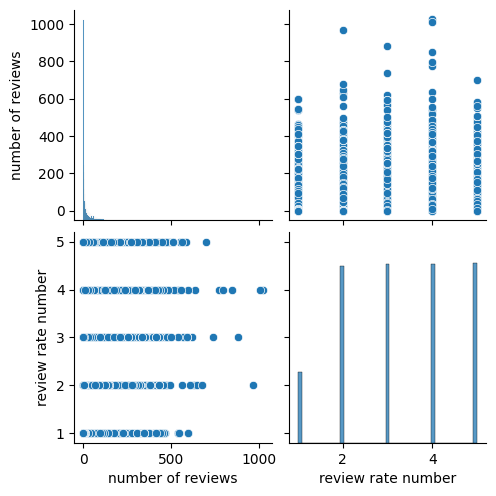

In [12]:
# relationship between number of reviews, rating, and prices
sns.pairplot(df[['number of reviews', 'review rate number', 'price']])
plt.show()

In [6]:
# correlation matrix
correlation_matrix = df[['number of reviews', 'review rate number', 'price']].corr(numeric_only=True)

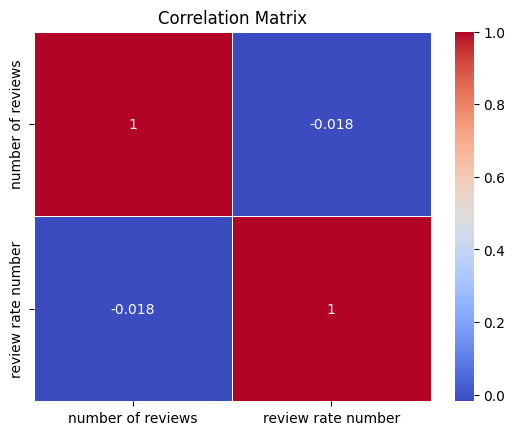

In [7]:
# correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

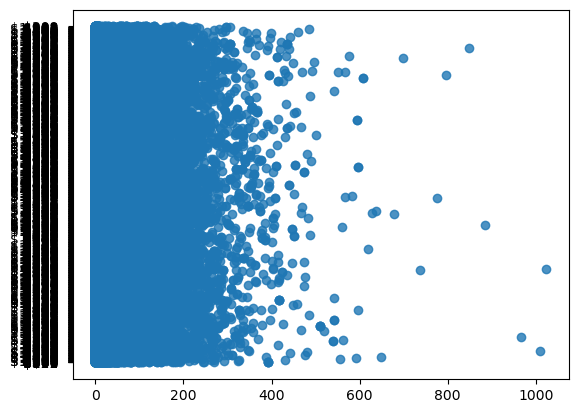

In [19]:
# convert to numeric
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df['review rate number'] = pd.to_numeric(df['review rate number'], errors='coerce')

# regression
sns.regplot(x='number of reviews', y='price', data=df)
plt.title('Regression Analysis: Number of Reviews vs. Price')
plt.show()

sns.regplot(x='review rate number', y='price', data=df)
plt.title('Regression Analysis: Review Rate Number vs. Price')
plt.show()